In [1]:
%matplotlib inline
from matplotlib import pyplot as plt, cm
import cv2
import numpy as np

In [2]:
# Step 1: Smooth the image using a Gaussian filter to remove high frequency noise.
# Step 2: Compute the gradient intensity representations of the image.
# Step 3: Apply non-maximum suppression to remove “false” responses to to edge detection.
# Step 4: Apply thresholding using a lower and upper boundary on the gradient values.
# Step 5: Track edges using hysteresis by suppressing weak edges that are not connected to strong edges.

In [3]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    
    # return the edged image
    return edged

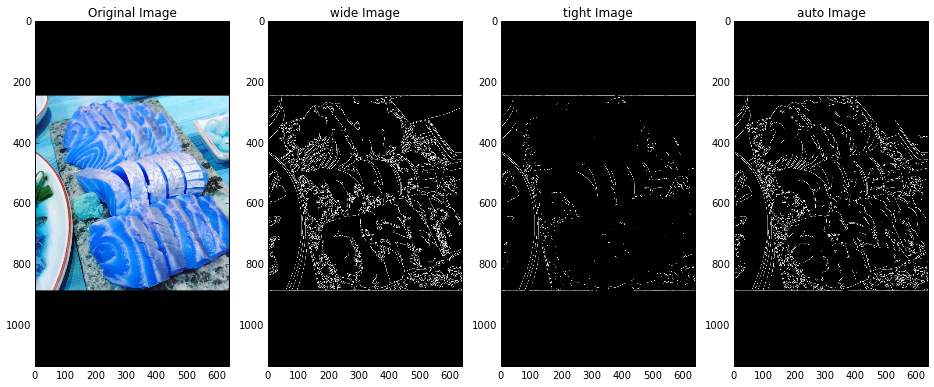

In [4]:
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread("./data/thumb_IMG_3962_1024.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred, 10, 200)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)

# show the images

plt.figure(figsize=(16,12))
plt.subplot(141), plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.subplot(142), plt.imshow(wide, cmap = 'gray')
plt.title('wide Image')
plt.subplot(143), plt.imshow(tight, cmap = 'gray')
plt.title('tight Image')
plt.subplot(144), plt.imshow(auto, cmap = 'gray')
plt.title('auto Image')